# Highlighting your data
> How do you show all of your data while making sure that viewers don't miss an important point or points? Here we discuss how to guide your viewer through the data with color-based highlights and text. We also introduce a dataset on common pollutant values across the United States. This is the Summary of lecture "Improving Your Data Visualizations in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/annotations.png

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Highlighting data
- Why Data Visualization?
    - Raw data $ \rightarrow $ tactile representations
    - Sometimes purely cosmetic
    - Sometimes essential to understanding data

### Hardcoding a highlight
You are working with the city of Houston to look at the relationship between sulfur dioxide ($SO_2$) and nitrogen dioxide ($NO_2$) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the $SO_2$ levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

In [2]:
pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution.head()

city  year  month  day     CO   NO2     O3    SO2
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05

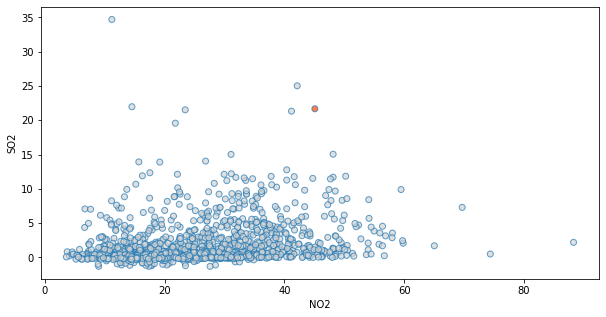

In [3]:
houston_pollution = pollution[pollution.city == 'Houston']

# Make array orangered for day 330 of year 2015, otherwise lightgray
houston_colors = ['orangered' if (day == 330) & (year == 2014) else 'lightgray'
                  for day, year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
           y='SO2',
           data=houston_pollution,
           fit_reg = False,
           # Send scatterplot argument to color points
           scatter_kws={'facecolors': houston_colors, 'alpha': 0.7});

In just a few lines of code you've made a plot that clearly highlights a given datapoint. The gray color of the non-highlighted points here helps them provide context but does not overcrowd the main points of interest. Here you see that Nov 26th happened to be on the high end for both $SO_2$ and $NO_2$.

### Programmatically creating a highlight
You are continuing your work for the city of Houston. Now you want to look at the behavior of both $NO_2$ and $SO_2$ when the un-plotted ozone ($O_3$) value was at its highest.

To do this, replace the logic in the current list comprehension with one that compares a row's $O_3$ value with the highest observed $O_3$ in the dataset. Note: use `sns.scatterplot()` instead of `sns.regplot()`. This is because `sns.scatterplot()` can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.

/home/chanseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


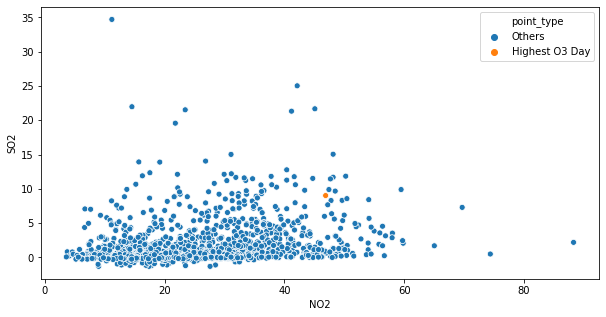

In [4]:
# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3 == max_O3 
                                   else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y='SO2',
                hue='point_type',
               data = houston_pollution);

Highlights are great for making plots to show others, but they can also help you explore a dataset. Sometimes you will want to highlight a point in a plot based upon its value for some variable not displayed. In this plot, we used automatic filtering to see that the highest $O_3$ day fell in the upper (but not highest) values of $NO_2$ and $SO_2$. This indicates a potentially weak interaction between $O_3$ and the other variables.

## Comparing groups


### Comparing with two KDEs
Imagine that you work for the premier air-filter provider. Your company has asked you to build a report that looks into why 2012 was a particularly good year for sales of your ozone ($O_3$) filter. You downloaded some helpful pollution data from the USGS, and you want to make a concise visualization that compares the general pattern of $O_3$ pollution for 2012 to all other years on record.

To do this, you can build two overlaid kernel density estimation plots (KDEs): one for 2012 $O_3$ data and one for all other years.

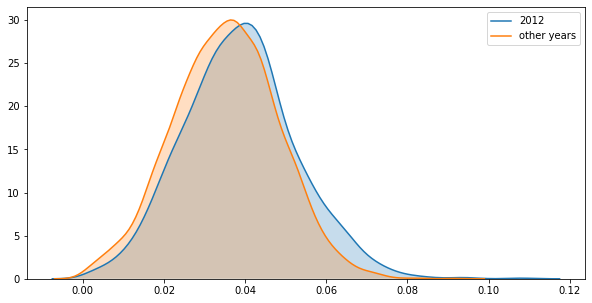

In [5]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012');

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years');

From this plot, we can see that 2012 had slightly higher than typical $O_3$ levels, which may explain the filter sales. However, keen observers will note that some of our cities don't have full data for 2012, which could skew the trends. Next up we will look at techniques that can help out KDE's be more honest about this lack of data.

### Improving your KDEs
One way of enhancing KDEs is with the addition of a rug plot. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful when you don't have a ton of data.

With small amounts of data you often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the `sns.distplot()` function to draw two KDEs: one looking at the data for `Vandenberg Air Force Base` and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a rug plot beneath it.

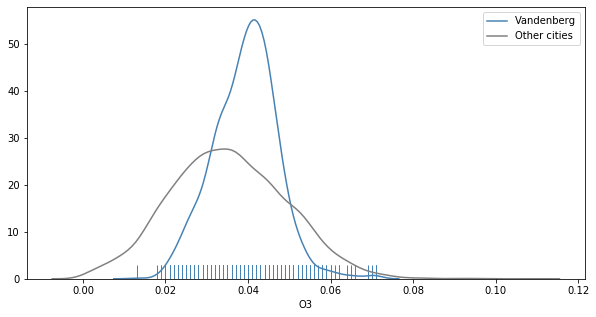

In [6]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True);

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray');

Rug plots can improve KDEs as they help you see those gaps that you may have otherwise assumed were filled with data. In this plot, the rug plot shows that there is a small, but not neglible gap, in the data around $O_3$ = 0.065.

### Beeswarms
Build a beeswarm plot using `sns.swarmplot()` that looks at the Ozone levels for all the cities in the `pollution` data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since you've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

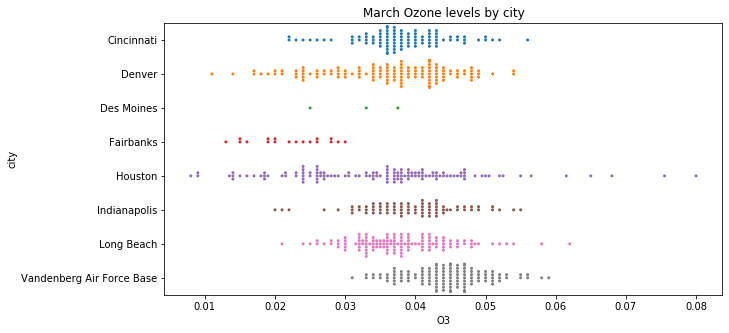

In [7]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3);

# Give a descriptive title
plt.title('March Ozone levels by city');

Beeswarms are a nice (and nice looking) way of comparing a bunch of classes to each other. In the plot, you can see that Vandenberg on average has high $O_3$ levels in March. However, Houston has a much wider range and can sometimes reach much higher levels.

Additionally, you can also get a sense of data quantities. Here, you see that Des Moines and Fairbanks have far fewer observations than the other sites.

## Annotations
- What annotations add
    - Compact and efficient communication
    - Opportunity to supply deeper insight to data
- When to use annotations
![annotations](image/annotations.png)

### A basic text annotation
On the current scatter plot, you can see a particularly prominent point that contains the largest $SO_2$ value observed for August. This point is Cincinnati on August 11th, 2013; however, you would not be able to learn this information from the plot in its current form. Basic text annotations are great for pointing out interesting outliers and giving a bit more information. Draw the readers attention to this Cincinnati value by adding a basic text annotation that gives a bit of the background about this outlier.

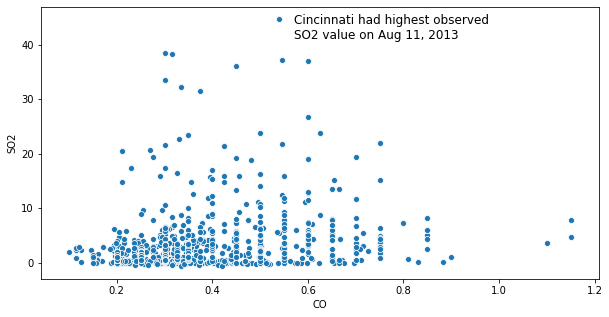

In [8]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8]);

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'});

It's amazing how something as simple as adding a bit of text on a plot can take it from something the reader mindlessly scans to a learning experience. Here we have managed to convey the large-scale relationship of the two pollutants while also giving the viewer a glimpse into an outlier.

### Arrow annotations
Imagine you are a city planner for Long Beach, California. Long Beach is located on the Pacific Ocean and has a large firework show every New Year's Eve. You want to look into whether this show negatively impacts the air quality of the city. To do this, you will look at $CO$ and $NO_2$ levels on New Year's Day. However, it turns out that New Year's Day is not one of the outliers in the plot on the right, it's located in one of the more crowded areas.

To help guide the reader to this point, you'll use an annotation along with an arrow that points to the New Year's Day value. This will provide a nice annotation that explains what the viewer is looking while printing the text in a less crowded region of the plot.

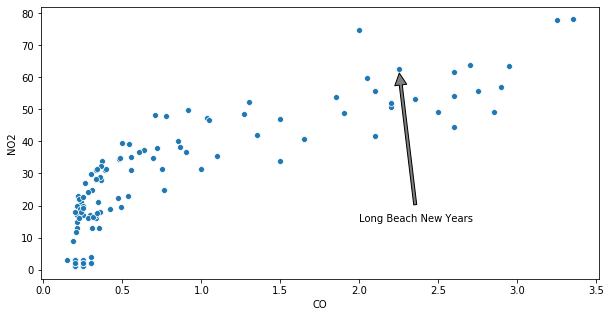

In [9]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution);

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears['CO'], lb_newyears['NO2']),
               xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white');

Using arrows with annotations is a great way to keep your text in a nice point-free area of the plot while precisely calling out a given point in a more-crowded location. In this plot, there is what appears to be a slightly higher than normal quantity of $NO_2$ in the air compared to usual. The viewer's attention is driven to the point of interest at first rather than the more obvious outliers, thus kicking off their exploration of the chart in a guided way.

### Combining annotations and color
You believe that Long Beach, California has a smog problem. Using the pollution data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization wizardry. Specifically, you want to focus on the relationship of $CO$ to $O_3$ levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, you've decided to highlight Long Beach and draw attention to a particularly bad day where the $CO$ level was 1.6 and $O_3$ was 0.072 using an annotation.

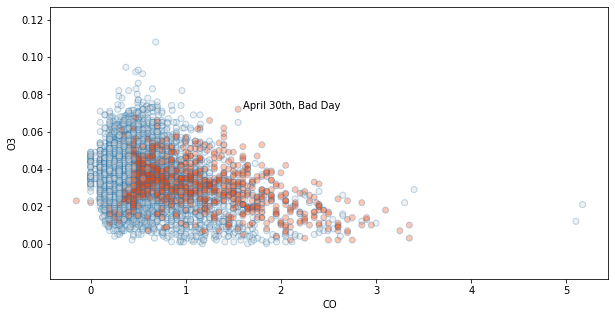

In [10]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3});

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day');

 List comprehensions are a great tool for quickly controlling colors or other aspects for a plot. It's often easier and cleaner to directly pass a vector of the desired aesthetics to your plot rather than adding a new column to your DataFrame (for instance in this example a column containing True or False for if a city is Long Beach) and then telling your plot how to map that column to aesthetics.
In this course, you'll continue exploring techniques to make your data visualizations more efficient, attractive, and impactful.